Fire Detection Model using Deep Learning

import libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

2024-10-22 11:36:23.550546: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Set the path for train and test dataset

In [2]:
train_data_dir = '/Users/kuriankgeorge/Desktop/aws/Capstone/04_Fire_Detection/data/FOREST_FIRE_SMOKE_AND_NON_FIRE_DATASET/train'
test_data_dir = '/Users/kuriankgeorge/Desktop/aws/Capstone/04_Fire_Detection/data/FOREST_FIRE_SMOKE_AND_NON_FIRE_DATASET/test'

Image dimensions

In [3]:
img_width, img_height = 150, 150

Hyperparameters

In [4]:
batch_size = 32
epochs = 8
num_classes = 3  # Fire, Non-Fire, Smoke

Data Augmentation and Data Preprocessing

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [6]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 31899 images belonging to 3 classes.


In [8]:
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 10500 images belonging to 3 classes.


Building the CNN Model

In [9]:
model = Sequential()

Convolutional Layer 1

In [10]:
model.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Convolutional Layer 2

In [11]:
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

Convolutional Layer 3

In [12]:
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

Flatten the result

In [13]:
model.add(Flatten())

Fully Connected Layer 1

In [14]:
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

Output Layer

In [15]:
model.add(Dense(num_classes, activation='softmax'))

Compile the model

In [16]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model summary

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,035,203 (72.61 MB)

 Trainable params: 19,035,203 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

Train the model

Removing the non image files

In [18]:
import os
from PIL import Image

def remove_corrupt_images(directory):
    for filename in os.listdir(directory):
        filepath = os.path.join(directory, filename)
        try:
            img = Image.open(filepath)  # Try opening the image
            img.verify()  # Verify that it is an image
        except (IOError, SyntaxError) as e:
            print(f'Removing corrupt image: {filepath}')
            os.remove(filepath)

remove_corrupt_images('/Users/kuriankgeorge/Desktop/aws/Capstone/04_Fire_Detection/data/FOREST_FIRE_SMOKE_AND_NON_FIRE_DATASET/train/fire')
remove_corrupt_images('/Users/kuriankgeorge/Desktop/aws/Capstone/04_Fire_Detection/data/FOREST_FIRE_SMOKE_AND_NON_FIRE_DATASET/train/non fire')
remove_corrupt_images('/Users/kuriankgeorge/Desktop/aws/Capstone/04_Fire_Detection/data/FOREST_FIRE_SMOKE_AND_NON_FIRE_DATASET/train/Smoke')

remove_corrupt_images('/Users/kuriankgeorge/Desktop/aws/Capstone/04_Fire_Detection/data/FOREST_FIRE_SMOKE_AND_NON_FIRE_DATASET/test/fire')
remove_corrupt_images('/Users/kuriankgeorge/Desktop/aws/Capstone/04_Fire_Detection/data/FOREST_FIRE_SMOKE_AND_NON_FIRE_DATASET/test/non fire')
remove_corrupt_images('/Users/kuriankgeorge/Desktop/aws/Capstone/04_Fire_Detection/data/FOREST_FIRE_SMOKE_AND_NON_FIRE_DATASET/test/Smoke')

Removing corrupt image: /Users/kuriankgeorge/Desktop/aws/Capstone/04_Fire_Detection/data/FOREST_FIRE_SMOKE_AND_NON_FIRE_DATASET/train/fire/.DS_Store


Remove Invalid Paths

In [19]:
import os

def check_files_in_directory(directory):
    for folder in ['fire', 'non fire', 'Smoke']:
        folder_path = os.path.join(directory, folder)
        for filename in os.listdir(folder_path):
            filepath = os.path.join(folder_path, filename)
            if not os.path.exists(filepath):
                print(f"File not found: {filepath}")
                os.remove(filepath)

# Clean both train and test directories
check_files_in_directory('/Users/kuriankgeorge/Desktop/aws/Capstone/04_Fire_Detection/data/FOREST_FIRE_SMOKE_AND_NON_FIRE_DATASET/train')
check_files_in_directory('/Users/kuriankgeorge/Desktop/aws/Capstone/04_Fire_Detection/data/FOREST_FIRE_SMOKE_AND_NON_FIRE_DATASET/test')

In [20]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def safe_data_generator(generator):
    """Yields data from generator, skipping batches with missing or corrupted files."""
    while True:
        try:
            yield next(generator)
        except (FileNotFoundError, OSError) as e:
            # Handle both missing and corrupted image files
            print(f"Skipping batch due to file error: {e}")

# Use the safe_data_generator for both training and validation generators
train_generator_safe = safe_data_generator(train_generator)
test_generator_safe = safe_data_generator(test_generator)

# Train the model using the safe generators
history = model.fit(
    train_generator_safe,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=test_generator_safe,
    validation_steps=test_generator.samples // batch_size,
    epochs=epochs
)

Epoch 1/8
996/996 ━━━━━━━━━━━━━━━━━━━━ 1815s 2s/step - accuracy: 0.8643 - loss: 0.3914 - val_accuracy: 0.8713 - val_loss: 0.3259
Epoch 2/8
996/996 ━━━━━━━━━━━━━━━━━━━━ 1595s 2s/step - accuracy: 0.9346 - loss: 0.1957 - val_accuracy: 0.9137 - val_loss: 0.2382
Epoch 3/8
996/996 ━━━━━━━━━━━━━━━━━━━━ 1704s 2s/step - accuracy: 0.9450 - loss: 0.1713 - val_accuracy: 0.9413 - val_loss: 0.1646
Epoch 4/8
996/996 ━━━━━━━━━━━━━━━━━━━━ 1548s 2s/step - accuracy: 0.9503 - loss: 0.1463 - val_accuracy: 0.9565 - val_loss: 0.1274
Epoch 5/8
996/996 ━━━━━━━━━━━━━━━━━━━━ 1556s 2s/step - accuracy: 0.9554 - loss: 0.1350 - val_accuracy: 0.9511 - val_loss: 0.1397
Epoch 6/8
996/996 ━━━━━━━━━━━━━━━━━━━━ 1538s 2s/step - accuracy: 0.9591 - loss: 0.1264 - val_accuracy: 0.9480 - val_loss: 0.1490
Epoch 7/8
996/996 ━━━━━━━━━━━━━━━━━━━━ 1497s 2s/step - accuracy: 0.9644 - loss: 0.1116 - val_accuracy: 0.9534 - val_loss: 0.1358
Epoch 8/8
996/996 ━━━━━━━━━━━━━━━━━━━━ 2388s 2s/step - accuracy: 0.9665 - loss: 0.1022 - val_accu

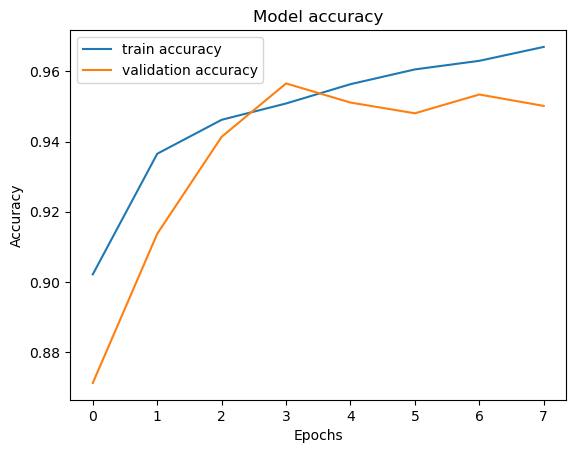

In [21]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

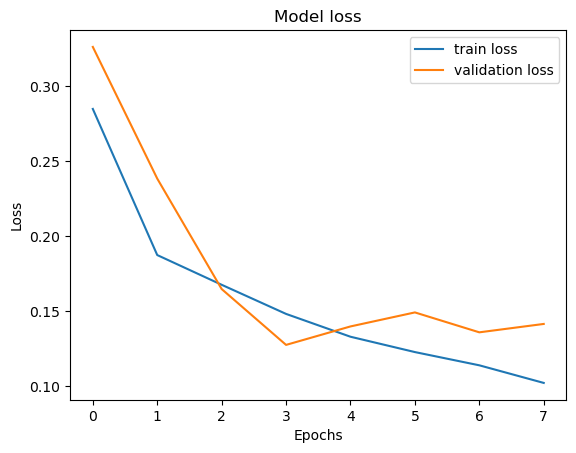

In [22]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Save the model

In [23]:
model.save('fire_detection_model.h5')

In [24]:
# Evaluation
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f'Test accuracy: {test_acc}')

/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


328/328 ━━━━━━━━━━━━━━━━━━━━ 222s 677ms/step - accuracy: 0.9519 - loss: 0.1355
Test accuracy: 0.9503620266914368
